# COGS 108 - Final Project 

# Overview

The objective of this project was to analyze whether or not adding more recreational facilities would increase or decrease crime in San Diego. I used data that had people's ratings on parks in SD, and crimes committed in the surrounding areas of those parks (I used the zipcodes from both where the crimes were committed and the parks). This data was used to see if the amount of crime with a specific zipcode had any negative relationship with the rating of the parks with the corresponding zipcode. Although the data shows a large amount of crimes committed in areas with the zipcode 92101, I found that there was no relationship that could be determined with respect to the parks ratings. Thus, no conclusive evidence that additional recreational facilities influences crime levels.

# Name & GitHub ID

- Name: Raymond Ibrahim
- GitHub Username: rribrahi

# Research Question

Does the addition of more recreational facilities decrease crime in San Diego? 

## Background and Prior Work

To start this process, the first thing to do is understand San Diego's recreation department and see how many recreational facilities have already been established.The City of San Diego has 57 Recreation Centers, 13 Pools, 7 Skate Parks[1]. The recreational facilities are dispersed widely throughout the city and are 

The next thing to do is to determine if there has been previous work done to show a decrease in crime rates in areas with more reacreational facilities. The CDC found that parks use is determined by the crime in accosiated areas. A study was done in 2013 in Greensboro, North Carolina, where they administered surveys to different socio-economic households. Each participant in this study liived only a quarter away and was simply asked if they use their parks and for how long. They then analyzed the crime rates within those neighborhoods. The study ultimately found that if there exists high crime in a certain area, park use will decline [2]. CDC also discusses that the crime observered was happening in and around the areas. 

Although this study is limited in letting us see how additional recreational facilities will promote a decrease in crime, it brings light to the idea that park use might be low in areas with already existing crime. Moreover, it is important to note that additional recreation facilities might foster areas for more crime to take place. In many cities, people see parks as dangerous – magnets for illicit activities like drug dealing and places for criminals to access potential victims who, while engaged in recreation, may be less vigilant about their belongings and personal safety[3].

Some sources contend that the relationship between age and crime is high, and that the youth are generally responsible for most of the crime committed in cities [4]. This, however, is only conjecture but may suggest that new recreational facilities, as mentioned previously, may only be places for the youth to conduct criminal activity. 



All in all, the relationship between crime and parks remains up for debate [3].

References (include links):
- 1)https://www.sandiego.gov/park-and-recreation/centers
- 2)https://www.cdc.gov/pcd/issues/2020/19_0434.htm
- 3)https://news.ncsu.edu/2019/06/can-parks-help-fight-crime/
- 4)https://en.wikipedia.org/wiki/Crime_drop

# Hypothesis


Considering that recreational facitilies, like parks and other open spaces, allow for more crime to take place and how the use of parks is dtermined by the crime in those associated areas, I predict that the addition of more reacreational facilities will have a greater negative affect on crime in San Diego. New facilities will lead to the potential for future crime to take place.

# Dataset(s)

 Dataset 1:
- Dataset Name: yelp_SD_parks.csv
- Number of observations: 833

This dataset is simply a table of all parks in San Diego, the addresses to each park and the yelp ratings (score 1-5, 5 being the highest score. All in all, this data will be useful in finding the location of the parks and the overall ratings of each park. 


Dataset 1:
- Dataset Name: ARJISPublicCrime120920.csv
- Number of observations: 15442

This dataset is a csv file that shows all crimes that have been committed in San Diego so far in the year of 2020. This file has the location of each crime committed and has the type of crimes committed. 

I chose these two datasets because I will be able to see where crimes have been committed and if they were committed in close proximity to parks. I will then combine the data to see any relationship between the ratings of parks and crime occurrences. 

# Setup

In [203]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
   
import seaborn as sns
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

#removes decimals
pd.set_option('precision', 0)

In [204]:
#read data
df_yelp = pd.read_csv("yelp_SD_parks.csv")
df_crimes = pd.read_csv("ARJISPublicCrime120920.csv")

# Data Cleaning

-The first step was to simple get rid of the data that was not needed. I decided to drop the columns: url, phone, longitude, latitude, is_closed. I am primarily interested in the ratings and Zipcodes. 

In [205]:
df_yelp = df_yelp.drop(['url','id','phone','longitude','latitude','is_closed'], axis = 1)

#
df_yelp['ZipCode'] = df_yelp['address'].str[-5:]
df_yelp['ZipCode'] = pd.to_numeric(df_yelp['ZipCode'],errors='coerce')
df_yelp = df_yelp.drop(['address'], axis = 1)

df_yelp

,name,rating,review_count,ZipCode
0,Balboa Park,5,2105,92101
1,Civita Park,4,46,92108
2,Waterfront Park,4,242,92101
...,...,...,...,...
830,Petco Park,4,1667,92101
831,Ann D. L'Heureux Memorial Dog Park,3,50,92008
832,Fairbrook Farm,5,1,92028


In [206]:
#data cleaning
df_crimes = df_crimes.drop(['agency','activityDate','community'], axis = 1)
df_crimes = df_crimes.rename(columns={'BLOCK_ADDRESS': 'address'})
df_crimes

#merge the two dataframes on address
df = pd.merge(df_yelp, df_crimes, on='ZipCode')
df

,name,rating,review_count,ZipCode,CM_LEGEND,Charge_Description_Orig,address
0,Balboa Park,5,2105,92101,DRUGS/ALCOHOL VIOLATIONS,OPEN CONTAINER IN PUBLIC PARK,600 BLOCK 02ND AVENUE
1,Balboa Park,5,2105,92101,DRUGS/ALCOHOL VIOLATIONS,OPEN CONTAINER IN PUBLIC PARK,600 BLOCK 02ND AVENUE
2,Balboa Park,5,2105,92101,DRUGS/ALCOHOL VIOLATIONS,POSSESS CONTROLLED SUBSTANCE (M),1100 BLOCK PARK BOULEVARD
...,...,...,...,...,...,...,...
1184414,Fairbrook Farm,5,1,92028,DRUGS/ALCOHOL VIOLATIONS,POSSESS CONTROLLED SUBSTANCE (M),200 W BLOCK ASH STREET
1184415,Fairbrook Farm,5,1,92028,VEHICLE BREAK-IN/THEFT,PETTY THEFT(from Veh) (M),1400 BLOCK FARRAND ROAD
1184416,Fairbrook Farm,5,1,92028,DRUGS/ALCOHOL VIOLATIONS,POSS OPEN CONTAINER OF ALC IN PUBLIC (I),100 W BLOCK ASH STREET


After this final step, the data is nicely organzied into a condensed dataframe that will be used for the EDA and analysis ssection. I was able to take both the dataframes and merge them together with corrensponding zipcodes which will allow me to have the appropriate ratings for the zipcodes. It is also important to iterate that there was no need for extensive data cleaning, like getting rid null values etc., because the dataset used showing the crimes had no null values as well as the yelp dataset. I also got rid of the many columns that could have possible null values. Overall, this data cleaing was simple for our intended pruposes.

# Data Analysis & Results

The next step in the process was to create some visualizations of the dataframes to see any sort of relationship between the zipcodes and the ratings. It is important to note that every single observation has a crime associated with it.

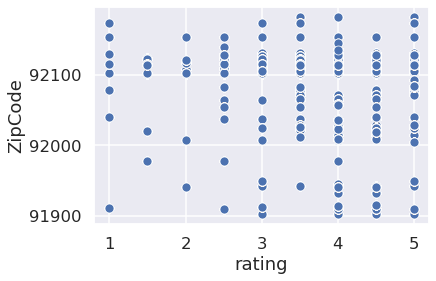

In [207]:
#graph Zipcode and rating, grouping by the zip code 
scatt = df.groupby(df['ZipCode'])
sns.scatterplot(x = df['rating'], y = df['ZipCode'])

I decided to make a basic scatter plot to see any initial dense areas with respect to a particular Zipcode. This graph shows evidence that more ratings were given by yelp users in Zipcodes from 92000- 92100.

The next step is to make a histogram that shows the frequency of ratings.

4.0146717752278125

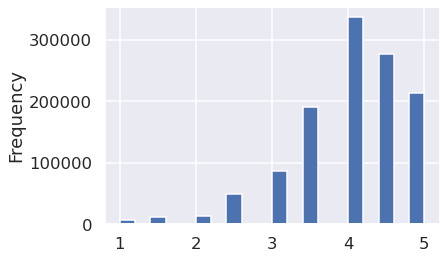

In [208]:
#Making the histogram of the ratings
ratings_plot = df['rating'].plot.hist(bins = 20)
#Finding the mean rating of parks
df_mean = df['rating'].mean()
df_mean

This histogram is key in seeing the amount of positive reviews for the parks in San Diego. We also should note that the mean is about 4.01. We can infer that San Diego has an above average rating for parks despite crimianl activity within the parks surrounding Zipcode.

Next we make a histogram of the Zipcodes in San Diego. The reason I am using the zipcodes in this instance is because if we look closely at the merged dataframe, for every zipcode there is an associated crime. This means that for every zipcode counted in the histogram it is also counting a crime that was commited in that zipcode. In summary, a Zipcode equals a crime.

0    92101
dtype: float64

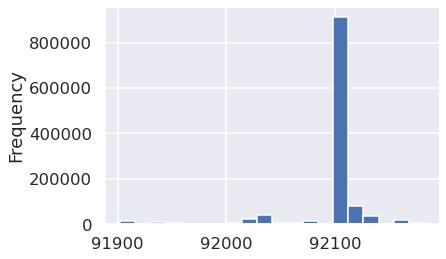

In [209]:
#Making the histogram of the Zipcode, which also counts crimes
ratings_plot = df['ZipCode'].plot.hist(bins = 20)
#Finding the mean number of crimes in parks
df_mode = df['ZipCode'].mode()
df_mode

The above histogram shows a large concentration of crimes being committed in the 92000's through the 92100's. This was previously evidenced above where the scatter plot also showed us these concentrations. According to this histogram, we can infer that most of the crimes are committed in areas with the 92100 zipcode. The most frequent zipcode with the most crimes within that zipcode was 92101!

# Analysis
After looking at the three data visualizations above and finding their respective means and modes, we can see some interesting trends:
    1)Most crimes were committed in the areas with the following zipcode, 92101
    2)The average rating across all parks was a 4.01, which is a decent rating for parks
    3)Lastly, the scatterplot shows that there were more ratings and crimes in zipcodes from 92000- 92100

Next I wanted to try linear predictive model to see if there is actually any underlying relationship in this bivariate data.

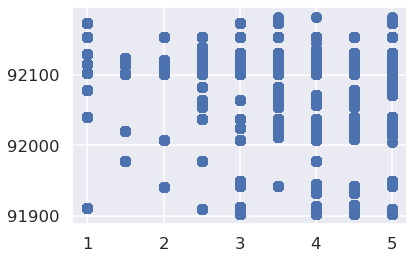

In [212]:
#1-degree linear model
(a1,b1) = np.polyfit(df['rating'], df['ZipCode'], 1)
x = np.arange(1,6)
pred_rating = a1*x+b1


#
plot = plt.scatter(df['rating'],df['ZipCode'])
pred_line = plt.plot(x,pred_rating,color='red')


f5 = plt.gcf()

As we see above, with the data given we are not even able to create a red regression line because there is no trend. As a result, we can only make broad generalizations about the relationship between crimes and ratings. 

# Ethics & Privacy

This project only used data that is already publicly accessible, which helps with any privacy issues. The data I used for the crimes is also available publicly. There is some harm that could be done with respect to the crime data because it has addresses attached to each crime; however, this data is accessible to anyone online and I ultimately removed addresses from the dataset during the data cleaning.

My data might have potential biases where I am limited to the those with yelp to speak for any trend or relatioship that would be made. Ideally we would want to have data where everyone in the city of San Diego has given a rating on all the parks, but, again, we are limited to only those who actually have yelp accounts and gave a rating. Maybe we are leaving out those who do not have the technological means to be a part of this data? This limitation factor could definitely lead to bias in the data.  



# Conclusion & Discussion

In order to see if additional recreational facilities would have any affect on crime, I analyzed data that gave insight to people's overall satisfaction of the parks in San Diego, as well as the amount crime in those areas. If we were to see a trend where people gave poor ratings to the parks where there is a high level of crime, we could conclude that the addition of recreational facilities would not be used much. As previously mentioned in the prior work section, parks that are not used much can facilitate, and even foster more criminal activity.

However, we cannot say for certainty that crime would decrease or increase with more recreational facilities. The data used was limited. If we had, for instance, data showing a considerable amount of crime being conducted at parks specifically, then we could say with a high level of confidence that adding more would lead to more crime. All in all, the data I was given could have been handled differently where I could have ran a TF-IDF on the yelp ratings to see why people gave certain ratings or I possibly could have done more spatial visualizations showing exaclty where the crime was being conducted; however, the time to conduct this analysis was limited and this still would only lead to infereces and generalizations. 

In summary, after a considerable amount of analyzing the data we can conclude that we cannot predict that additional recreational facilities would increase or decrease crime.

